<a href="https://colab.research.google.com/github/anmolkumar2024/-Data-Structures-in-Python/blob/main/playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA(Exploratory Data Analysis) in Googleplay store Dataset
# Follow on Three steps
#  1. Profile of Data set.
#  2. Sataiscal bases Analysis.
#  3. Graph based analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(483)

In [ ]:
df['Reviews'].dtype

dtype('O')

In [ ]:
df[~df['Reviews'].str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [ ]:
df_copy = df.copy()
df_copy


App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [ ]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [ ]:
df_copy = df_copy.drop(df_copy.index[10472])
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10840 rows x 13 columns]

In [ ]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [ ]:
df_copy['Reviews'] = df_copy['Reviews'].astype('int')

In [ ]:
df_copy['Reviews'].dtype

dtype('int64')

In [ ]:
df_copy['Reviews'].inplace = True

In [ ]:
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
0         4.1      159                 19M      10,000+  Free     0   
1         3.9      967                 14M     500,000+  Free     0   
2         4.7    87510                8.7M   5,000,000+  Free     0   
3         4.5   215644                 25M  50,000,000+  Free     0   
4         4.3      967                2.8M     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10840 rows x 13 columns]

In [ ]:
df_copy['Reviews'].dtype

dtype('int64')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


In [ ]:
df_copy['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [ ]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df_copy['Size'].dtype

dtype('O')

In [ ]:
item = '19M'
item[-1]

'M'

In [ ]:
item.replace('M','')

'19'

In [ ]:
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
0         4.1      159                 19M      10,000+  Free     0   
1         3.9      967                 14M     500,000+  Free     0   
2         4.7    87510                8.7M   5,000,000+  Free     0   
3         4.5   215644                 25M  50,000,000+  Free     0   
4         4.3      967                2.8M     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10840 rows x 13 columns]

In [ ]:
# 1 mb = 1024 Kb

def size_process(item):
    if str(item)[-1] == 'M':
       result = float(str(item).replace('M',''))
       result = result*1024
       return result
    elif str(item)[-1] =='k':
       result = float(str(item).replace('k',''))
       return result
    else:
        return str(np.nan)

In [ ]:
df_copy['Size'] = df_copy['Size'].apply(size_process)


In [ ]:
df_copy['Size'] = df_copy['Size'].astype('float')
df_copy['Size']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        NaN
10840    19456.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     Size     Installs  Type Price Content Rating  \
0         4.1      159  19456.0      10,000+  Free     0       Everyone   
1         3.9      967  14336.0     500,000+  Free     0       Everyone   
2         4.7    87510   8908.8   5,000,000+  Free     0       Everyone   
3         4.5   215644  25600.0  50,000,000+  Free     0           Teen   
4         4.3      967   2867.2     100,000+  Free     0       Everyone   
...       ...      ...      ...          ...   ...   ...            ...   
10836     4.5       38  54272.0       5,000+  Free     0       Everyone   
10837     5.0        4   3686.4         100+  Free     0       Everyone   
10838     NaN        3   9728.0       1,000+  Free     0       Everyone   
10839     4.5      114      NaN       1,000+  Free     0     Mature 17+   
10840     4.5   398307  19456.0  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[10840 rows x 13 columns]

In [ ]:
df_copy['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [ ]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+','').str.replace(',','')
df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [ ]:
df_copy['Installs'] = df_copy['Installs'].astype('int')
df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [ ]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df_copy['Price'] = df_copy['Price'].str.replace('$','').astype('float')
df_copy['Price']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [ ]:
df_copy.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
df_copy['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [ ]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [ ]:
df_copy.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Day                        int32
Month                      int32
Year                       int32
dtype: object

In [ ]:
df_copy.drop('Last Updated',axis=1,inplace=True)

In [ ]:
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0         4.1      159  19456.0     10000  Free    0.0       Everyone   
1         3.9      967  14336.0    500000  Free    0.0       Everyone   
2         4.7    87510   8908.8   5000000  Free    0.0       Everyone   
3         4.5   215644  25600.0  50000000  Free    0.0           Teen   
4         4.3      967   2867.2    100000  Free    0.0       Everyone   
...       ...      ...      ...       ...   ...    ...            ...   
10836     4.5       38  54272.0      5000  Free    0.0       Everyone   
10837     5.0        4   3686.4       100  Free    0.0       Everyone   
10838     NaN        3   9728.0      1000  Free    0.0       Everyone   
10839     4.5      114      NaN      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19456.0  10000000  Free    0.0       Everyone   

                          Genres         Current Ver         Android Ver  Day  \
0                   Art & Design               1.0.0        4.0.3 and up    7   
1      Art & Design;Pretend Play               2.0.0        4.0.3 and up   15   
2                   Art & Design               1.2.4        4.0.3 and up    1   
3                   Art & Design  Varies with device          4.2 and up    8   
4        Art & Design;Creativity                 1.1          4.4 and up   20   
...                          ...                 ...                 ...  ...   
10836                  Education                1.48          4.1 and up   25   
10837                  Education                 1.0          4.1 and up    6   
10838                    Medical                 1.0          2.2 and up   20   
10839          Books & Reference  Varies with device  Varies with device   19   
10840                  Lifestyle  Varies with device  Varies with device   25   

       Month  Year  
0          1  2018  
1          1  2018  
2          8  2018  
3          6  2018  
4          6  2018  
...      ...   ...  
10836      7  2017  
10837      7  2018  
10838      1  2017  
10839      1  2015  
10840      7  2018  

[10840 rows x 15 columns]

In [ ]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df_copy["Android Ver"] = df_copy["Android Ver"].str.replace("and up","").str.replace('Varies with device',"")
df_copy["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df[df.duplicated("App")]

App       Category  Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2   80805   
236                                   Box       BUSINESS     4.2  159872   
239                    Google My Business       BUSINESS     4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4   31614   
261             join.me - Simple Meetings       BUSINESS     4.0    6989   
...                                   ...            ...     ...     ...   
10715                  FarmersOnly Dating         DATING     3.0    1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4   36981   
10730                         FP Notebook        MEDICAL     4.5     410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5   33599   
10768                                AAFP        MEDICAL     3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [ ]:
df_copy = df_copy.drop_duplicates(subset = ["App"], keep = 'first')
df_copy[df_copy.duplicated('App')]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Current Ver, Android Ver, Day, Month, Year]
Index: []

In [ ]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
Day                 int32
Month               int32
Year                int32
dtype: object

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.shape

(9659, 15)

In [ ]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# EDA
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == "object"]
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [ ]:
numerical_featutre = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
numerical_featutre

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [ ]:
for col in categorical_feature:
    print(f"{col} : {df_copy[col].value_counts(normalize = True)*100}")

App : App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
Category : Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036

In [ ]:
df_copy["App"].value_counts(normalize=True)*100

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64

In [ ]:
df_copy['Content Rating'].value_counts(normalize=True)*100

Content Rating
Everyone           81.820064
Teen               10.725748
Mature 17+          4.068744
Everyone 10+        3.333678
Adults only 18+     0.031059
Unrated             0.020706
Name: proportion, dtype: float64

<Axes: xlabel='Content Rating', ylabel='count'>

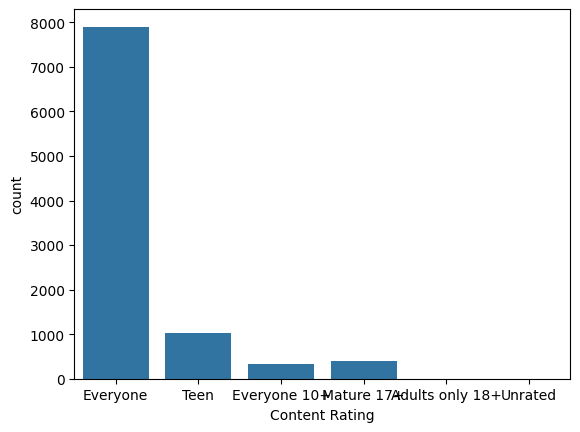

In [ ]:
sns.countplot(x = df_copy['Content Rating'])

In [ ]:
numerical_featutre

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [ ]:
df_copy["Price"].value_counts(normalize=True)*100

Price
0.00      92.173103
0.99       1.501191
2.99       1.283777
1.99       0.755772
4.99       0.724713
            ...    
3.61       0.010353
394.99     0.010353
1.26       0.010353
1.20       0.010353
1.04       0.010353
Name: proportion, Length: 92, dtype: float64

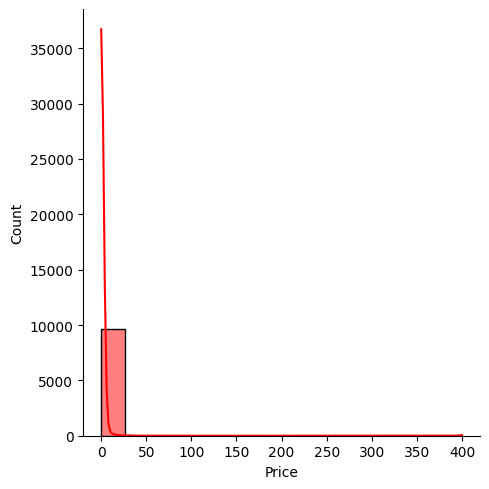

In [ ]:
sns.displot(df_copy["Price"], kde = True, color = "red")

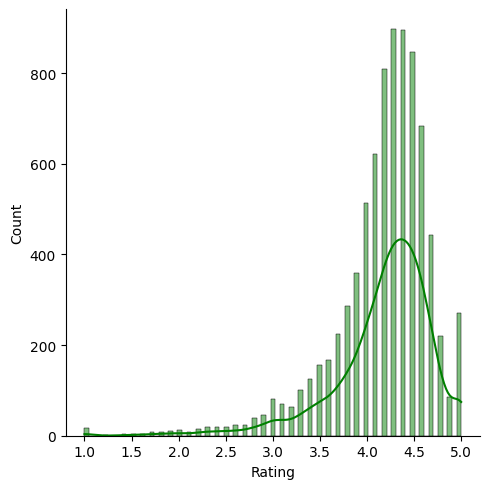

In [ ]:
sns.displot(df_copy["Rating"], kde = True, color = "green")

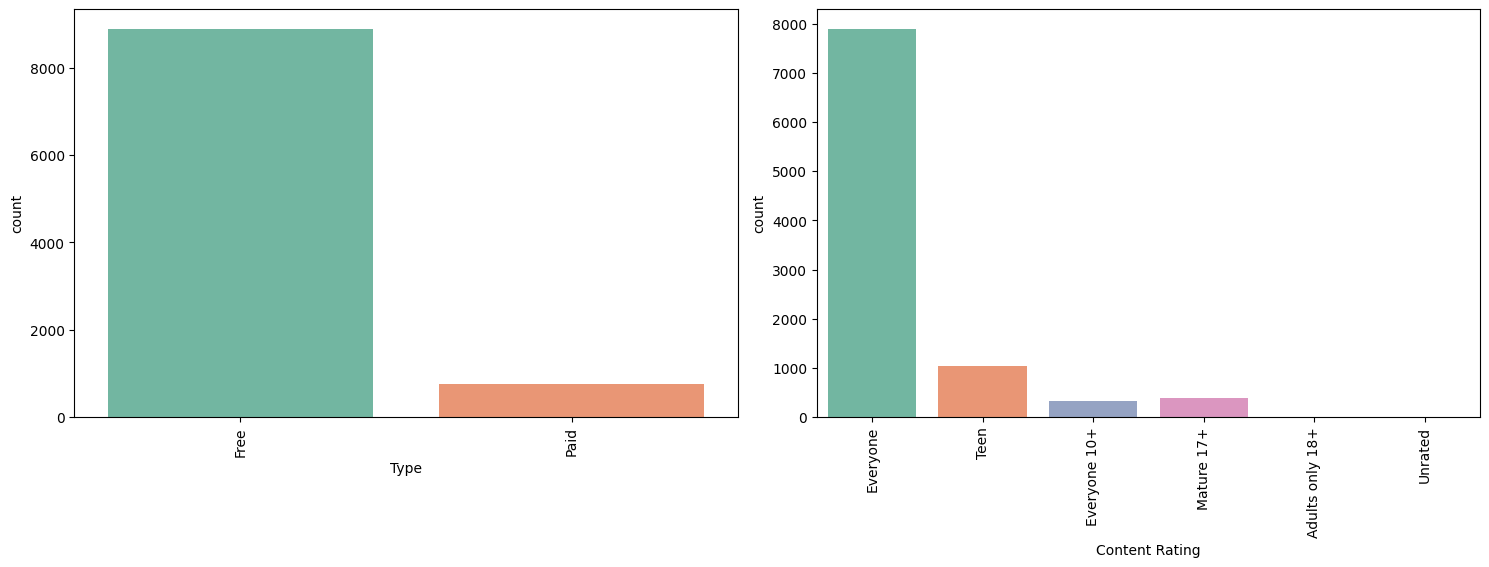

In [ ]:
plt.figure(figsize = (15,10))
category = ["Type", "Content Rating"]

for i in range(0, len(category)):
   plt.subplot(2,2,i+1)
   sns.countplot(x = df_copy[category[i]], palette = "Set2")
   plt.xticks(rotation = 90)
   plt.tight_layout()

# Q . Which category is the most popular category in the app?

# >> family is the most popular category with 19% of share

In [ ]:
df_copy["Category"].value_counts().head(3)

Category
FAMILY    1832
GAME       959
TOOLS      827
Name: count, dtype: int64

<Axes: ylabel='count'>

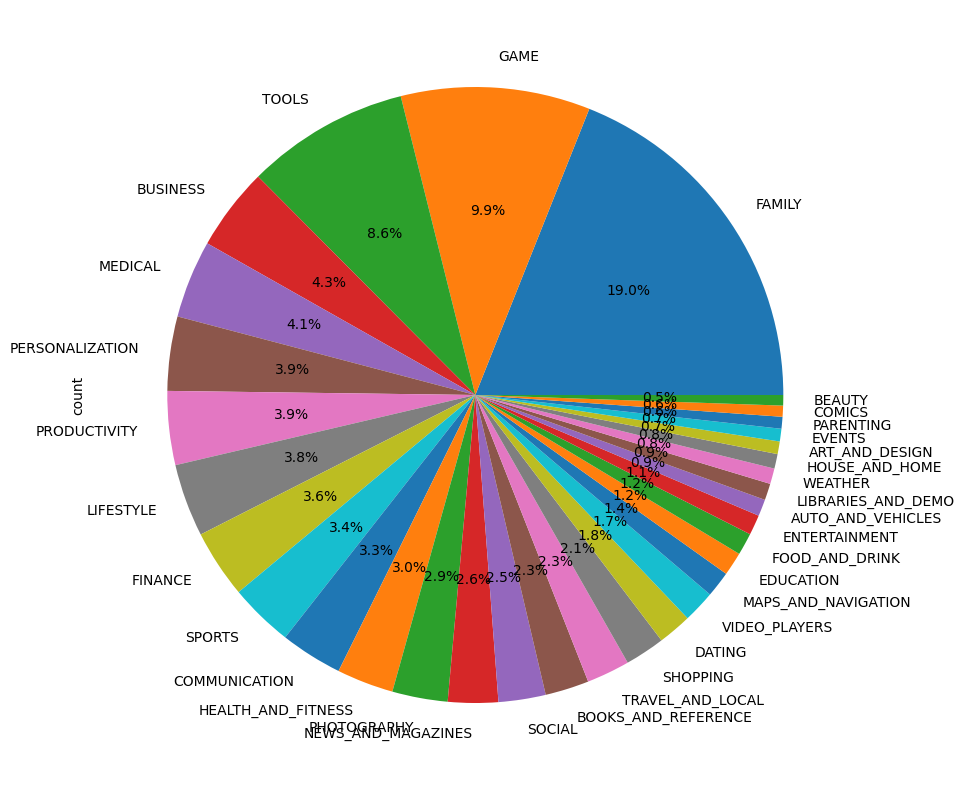

In [ ]:
df_copy["Category"].value_counts().plot.pie(y = df["Category"], figsize = (10,10),autopct = "%1.1f%%")


# What is the Top 10 important category

In [ ]:
catg = df_copy["Category"].value_counts()[:10]
catg

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

In [ ]:
category = catg.reset_index()
category

Category  count
0           FAMILY   1832
1             GAME    959
2            TOOLS    827
3         BUSINESS    420
4          MEDICAL    395
5  PERSONALIZATION    376
6     PRODUCTIVITY    374
7        LIFESTYLE    369
8          FINANCE    345
9           SPORTS    325

In [ ]:
category.columns = ['Groups', "counts"]


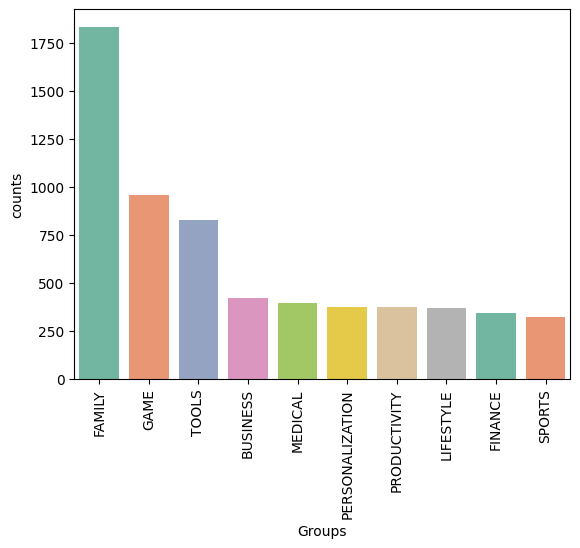

In [ ]:
sns.barplot(category, x = category["Groups"], y = category["counts"], palette = "Set2")
plt.xticks(rotation = 90)
plt.show()

# Q. Which category has the highest installation App?

# >> Games App(13878924415) are the most installed ones

In [ ]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
df_copy.groupby(["Category"])['Installs'].sum().sort_values(ascending = False).reset_index()

Category     Installs
0                  GAME  13878924415
1         COMMUNICATION  11038276251
2                 TOOLS   8001771915
3          PRODUCTIVITY   5793091369
4                SOCIAL   5487867902
5           PHOTOGRAPHY   4649147655
6                FAMILY   4427941505
7         VIDEO_PLAYERS   3926902720
8      TRAVEL_AND_LOCAL   2894887146
9    NEWS_AND_MAGAZINES   2369217760
10        ENTERTAINMENT   2113660000
11  BOOKS_AND_REFERENCE   1665969576
12      PERSONALIZATION   1532494782
13             SHOPPING   1400348785
14   HEALTH_AND_FITNESS   1144022512
15               SPORTS   1096474498
16             BUSINESS    697164865
17            LIFESTYLE    503823539
18  MAPS_AND_NAVIGATION    503281890
19              FINANCE    455348734
20              WEATHER    361100520
21            EDUCATION    352952000
22       FOOD_AND_DRINK    211798751
23               DATING    140926107
24       ART_AND_DESIGN    114338100
25       HOUSE_AND_HOME     97212461
26    AUTO_AND_VEHICLES     53130211
27   LIBRARIES_AND_DEMO     52995910
28               COMICS     44981150
29              MEDICAL     38193177
30            PARENTING     31521110
31               BEAUTY     27197050
32               EVENTS     15973161

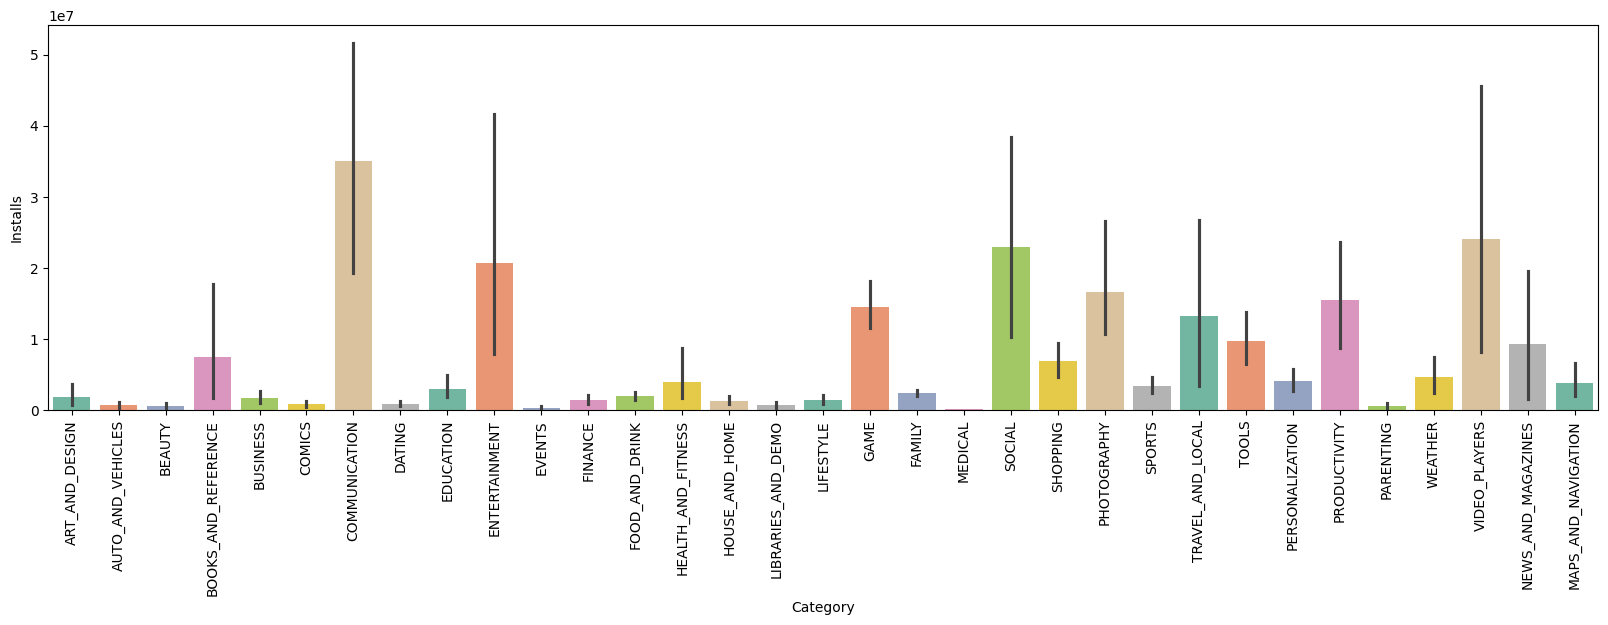

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = "Category", y = "Installs", data = df_copy, palette = "Set2")
plt.xticks(rotation = 90)
plt.show()

# Q. What are Top 5 installed category app in each Type ?
# >> Game app are free app highest installation


# Q. Which category app user are reviewing the most?


In [ ]:
df_copy.groupby(["Category"])['Reviews'].sum().sort_values(ascending = False).reset_index()

Category    Reviews
0                  GAME  622298709
1         COMMUNICATION  285811368
2                 TOOLS  229356578
3                SOCIAL  227927801
4                FAMILY  143825488
5           PHOTOGRAPHY  105351270
6         VIDEO_PLAYERS   67484568
7          PRODUCTIVITY   55590649
8       PERSONALIZATION   53543080
9              SHOPPING   44551730
10               SPORTS   35348813
11        ENTERTAINMENT   34762650
12     TRAVEL_AND_LOCAL   26819741
13   NEWS_AND_MAGAZINES   23130228
14   HEALTH_AND_FITNESS   21361355
15  MAPS_AND_NAVIGATION   17729148
16  BOOKS_AND_REFERENCE   16721314
17            EDUCATION   13364148
18              FINANCE   12662106
19              WEATHER   12295164
20            LIFESTYLE   11832671
21             BUSINESS    9890245
22       FOOD_AND_DRINK    6325028
23               DATING    3623544
24               COMICS    2342071
25       HOUSE_AND_HOME    1929847
26       ART_AND_DESIGN    1419203
27              MEDICAL    1182971
28    AUTO_AND_VEHICLES    1163666
29            PARENTING     958331
30   LIBRARIES_AND_DEMO     906831
31               BEAUTY     396240
32               EVENTS     161018

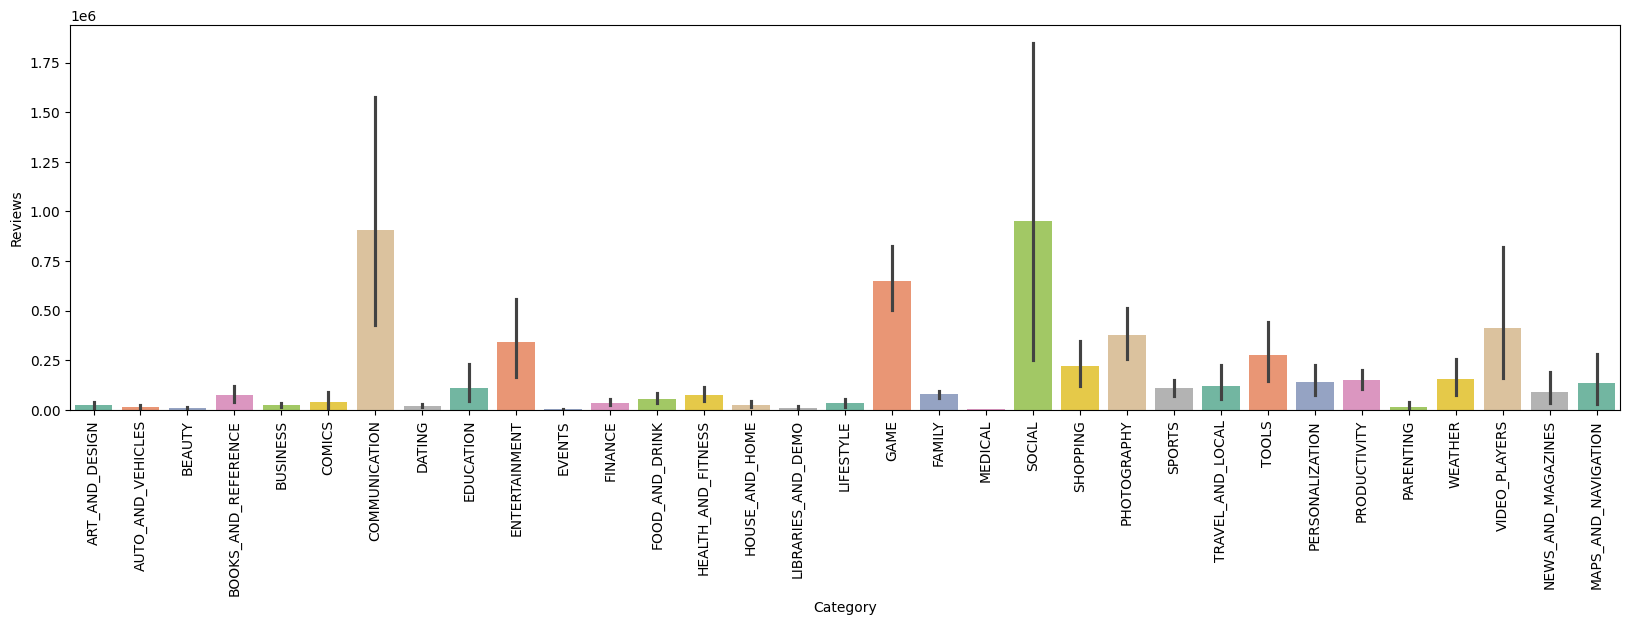

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = "Category", y = "Reviews", data = df_copy, palette = "Set2")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Top5 = df_copy.groupby(["App"])["Installs"].sum().sort_values(ascending = False).reset_index()[:5]
Top5

App    Installs
0                        WhatsApp Messenger  1000000000
1             Skype - free IM & video calls  1000000000
2                                   YouTube  1000000000
3                                    Google  1000000000
4  Messenger – Text and Video Chat for Free  1000000000

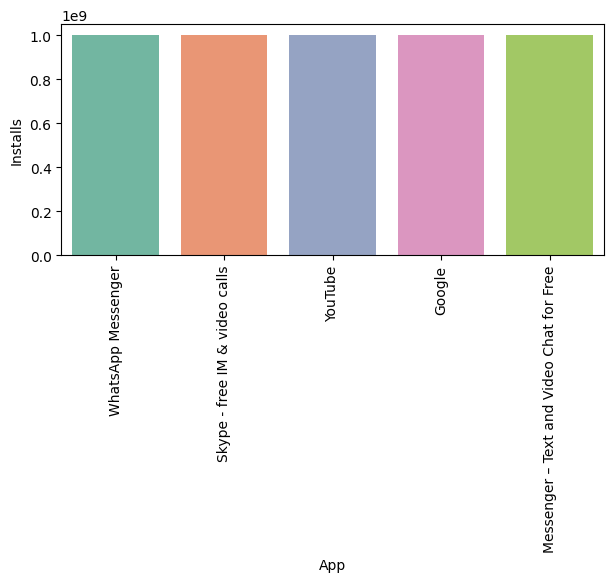

In [ ]:
plt.figure(figsize = (7,3))
sns.barplot(x = "App", y = "Installs", data = Top5, palette = "Set2")
plt.xticks(rotation = 90)
plt.show()